# Project Name: Human Activity Recognition (`HAR`) utilizing Long short-term memory (`LSTM`) for `PAMAP2`  & `OPPORTUNITY` Dataset

## 1. INTRODUCTION:

### 1.1. Introduction
Nowadays deep learning and machine learning have become an important field that is making a significant contribution to sensor-based human activity recognition. Wearables are an early part of understanding the richness of human activity recognition. It has a wide range of applications in many fields such as intelligent systems, ambient assisted living, security surveillance, the manufacturing industry, sports support, social science, and surveying systems. The primary motive for these applications is the ability to automatically and precisely detect human activities from often small sensors embedded in wearables.
Many approaches have been developed to solve the recognition problem and most machine learning algorithms and deep learning algorithms have been used in this field and evaluated through experiments. Wearables capture a person's activity dynamics by recording continuous measurements over time through different sensor channels and generating multi-channel time-series data streams. To analyze the recognition and classification of human physical activities (e.g. Walking, running, drinking, etc.) we propose that we implement different machine learning algorithms (Like Support Vector Machine, K-nearest Neighbor) and deep learning algorithms (such as Convolutional Neural Networks, LSTM) on 3 datasets which are OPPORTUNITY, UCI HAR, and PAMAP-2. With the help of these datasets our motive of comparing the accuracy and performance of the machine learning algorithm and deep learning algorithm in recognizing human daily physical activities.   
There are some existing papers that work on human activity recognition individually with different datasets. Since we want to do a comparative analysis, we don't have a data collection problem, we will take data for our analysis from different online sites, and we will train and test the data. After that, we will use the data with different machine learning and deep learning algorithms to find out the performance or accuracy, and then we will compare which one gives better performance. 
In our study, we found that Daniel Rogen and his teammates used the OPPORTUNITY and Skoda datasets and their algorithms were CNN and LSTM for their model. In their research, they demonstrated the benefits of a deep architecture based on a combination of convolutional and LSTM recurrent layers to perform activity recognition from wearable sensors.
Shaohua Wan and his teammates used a classification method based on a convolutional neural network (CNN), which uses a CNN to extract local features. Finally, CNN, LSTM, BLSTM, MLP, and SVM models are used on the UCI and Pamap2 datasets.

#### 1.2. Motivation
Many studies have been conducted on solving human activity recognition (HAR) problems with wearables, and Knowledge has been greatly improved with end-to-end deep learning paradigms. Human activity recognition (HAR) using wearable sensors is currently the latest topic in Deep neural networks due to its many applications. Our main goal is to compare and analyze the results obtained by running various machine learning and deep learning algorithms with multiple datasets. Inspired by previous HAR research, our main task is to propose a new HAR framework built on multiple datasets and demonstrate its performance realization using a variety of deep learning and machine learning-based algorithms that generalize to wearable sensor datasets. We have seen many papers that have predicted performance or accuracy with deep learning or machine learning but have not analyzed it on a comparative basis so the idea came from there we will implement and analyze both cases.

#### 1.3. Related Works
F. Attal et. al. (2015), suggest a review of different classification techniques used to recognize human activities from wearable inertial sensor data. Three main steps describe the activity recognition process: sensors' placement, data pre-processing and data classification. The HMM classifier is the one that gives the best results among unsupervised classification algorithms. <br>
According to the study of Ordóñez and Roggen (2016), deep convolutional neural networks are suited to automate feature extraction from raw sensor inputs. However, human activities are made of complex sequences of motor movements. The framework can be applied to homogeneous sensor modalities, but can also fuse multimodal sensors to improve performance.<br>
According to A. Murad et. al. (2017), adopting deep learning methods for human activity recognition has been effective in extracting discriminative features from raw input sequences acquired from body-worn sensors. We propose the use of deep recurrent neural networks for building recognition models that are capable of capturing long-range dependencies in variable-length input sequences.<br>
M.M. Hasan et. al. (2018) suggest, human activity recognition has grabbed considerable attention from pattern recognition and human–computer interaction researchers due to its prominent applications such as smart home health care. The proposed approach was compared with traditional expression recognition approaches such as typical multiclass Support Vector Machine (SVM) and Artificial Neural Network (ANN).<br>
Mobile edge computing is serving as a bridge to narrow the gaps between medical staff and patients. S. Wan’s (2020) paper designs a smartphone inertial accelerometer-based architecture for HAR. A real-time human activity classification method based on a convolutional neural network (CNN) is proposed.<br>
Activity recognition can be seen as a machine learning chain with its particular data preprocessing technique. J. Suto et. al. (2020) examine the efficiency of previously used machine learning methods in real time by an Android-based, self-learning, activity recognition application which has been designed for this study.<br>
Deep Stacked Multilayered Perceptron (DS-MLP) has been proposed in F. Rustam et. al. (2020) study for human activity recognition (HAR). This study uses sensor data from two low-cost sensors, gyroscope and accelerometer along with implementation of an Artificial Neural Network (ANN) for HAR.<br>
According to A. Murad et. al. (2021), Human Activity Recognition (HAR) employing inertial motion data has gained considerable momentum in recent years, both in research and industrial applications. The HAR method is evaluated on a public smartphone-based dataset of UCI-HAR through various combinations of sample generation processes and validation protocols.<br>
Many Artificial intelligence-based models are developed for activity recognition; however, these algorithms fail to extract spatial and temporal features. An extensive ablation study is performed over different machine learning and deep learning models to obtain the optimum solution for HAR. A new dataset is generated that is collected from 20 participants using the Kinect V2 sensor and contains 12 different classes of human activities in I. U. Khan’s study (2022).<br>
<br>
<img src=".\Data\Img\report_final.png" alt="Related Works" />

#### 1.4. Research Objective
The main objectives of this study is as follow: <br>
•	...............................

## **2. DATA ANALYSIS:**

#### **2.1. DATA PREPROCESSING:**

In [1]:
#Required cell: This cell needs to be executed to import the necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np
from scipy import stats
from scipy import integrate
from IPython.display import HTML, display
from scipy.stats import norm
from scipy.stats import t as the
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
%matplotlib inline

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 70)

<img src=".\Data\Img\data_format.PNG" alt="Data Format" />

In [2]:
# Load data
list_of_files = ['PAMAP2_Dataset/Protocol/subject101.dat',
                 'PAMAP2_Dataset/Protocol/subject102.dat',
                 'PAMAP2_Dataset/Protocol/subject103.dat',
                 'PAMAP2_Dataset/Protocol/subject104.dat',
                 'PAMAP2_Dataset/Protocol/subject105.dat',
                 'PAMAP2_Dataset/Protocol/subject106.dat',
                 'PAMAP2_Dataset/Protocol/subject107.dat',
                 'PAMAP2_Dataset/Protocol/subject108.dat',
                 'PAMAP2_Dataset/Protocol/subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list

len(columns)

54

In [3]:
dataCollection = pd.DataFrame()
for file in list_of_files:
    procData = pd.read_table(file, header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    dataCollection = pd.concat([dataCollection, procData], ignore_index=True)

dataCollection.reset_index(drop=True, inplace=True)
dataCollection.head()


,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.0,0.0,0.0,0.0,31.8125,0.238080,9.80003,-1.68896,0.265304,9.81549,-1.41344,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.0,0.0,0.0,0.0,30.3125,9.65918,-1.65569,-0.099797,9.64689,-1.55576,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047759,0.006474,14.8991,-69.2224,-5.82311,1.0,0.0,0.0,0.0,31.8125,0.319530,9.61282,-1.49328,0.234939,9.78539,-1.42846,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.0,0.0,0.0,0.0,30.3125,9.69370,-1.57902,-0.215687,9.61670,-1.61630,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.0,0.0,0.0,0.0,31.8125,0.235593,9.72421,-1.76621,0.173850,9.72528,-1.51894,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.0,0.0,0.0,0.0,30.3125,9.58944,-1.73276,0.092914,9.63173,-1.58605,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.0,0.0,0.0,0.0,31.8125,0.388697,9.53572,-1.72410,0.157969,9.64994,-1.57952,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.0,0.0,0.0,0.0,30.3125,9.58814,-1.77040,0.054545,9.63197,-1.63135,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.0,0.0,0.0,0.0,31.8125,0.315800,9.49908,-1.60914,0.233506,9.57411,-1.44418,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.0,0.0,0.0,0.0,30.3125,9.69771,-1.65625,-0.060809,9.64699,-1.64647,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


In [4]:
dataCollection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 55 columns):
 #   Column             Dtype  
---  ------             -----  
 0   timestamp          float64
 1   activityID         int64  
 2   heartrate          float64
 3   handTemperature    float64
 4   handAcc16_1        float64
 5   handAcc16_2        float64
 6   handAcc16_3        float64
 7   handAcc6_1         float64
 8   handAcc6_2         float64
 9   handAcc6_3         float64
 10  handGyro1          float64
 11  handGyro2          float64
 12  handGyro3          float64
 13  handMagne1         float64
 14  handMagne2         float64
 15  handMagne3         float64
 16  handOrientation1   float64
 17  handOrientation2   float64
 18  handOrientation3   float64
 19  handOrientation4   float64
 20  chestTemperature   float64
 21  chestAcc16_1       float64
 22  chestAcc16_2       float64
 23  chestAcc16_3       float64
 24  chestAcc6_1        float64
 25  chestAcc6_2       

In [5]:
dataCollection.isnull().sum()

timestamp                  0
activityID                 0
heartrate            2610265
handTemperature        13141
handAcc16_1            13141
                      ...   
ankleOrientation1      11749
ankleOrientation2      11749
ankleOrientation3      11749
ankleOrientation4      11749
subject_id                 0
Length: 55, dtype: int64

In [6]:
def dataCleaning(dataCollection):
        dataCollection = dataCollection.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                                             'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                                             'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                             axis = 1)  # removal of orientation columns as they are not needed
        dataCollection = dataCollection.drop(dataCollection[dataCollection.activityID == 0].index) #removal of any row of activity 0 as it is transient activity which it is not used
        #dataCollection = dataCollection.apply(pd.to_numeric, errors = 'coerse') #removal of non numeric data in cells
        dataCollection = dataCollection.interpolate() #removal of any remaining NaN value cells by constructing new data points in known set of data points
        
        return dataCollection

In [7]:
df = dataCleaning(dataCollection)

In [8]:
df.reset_index(drop = True, inplace = True)
df.head(10)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,0.063895,0.007175,0.024701,8.60505,-66.7184,-19.8429,32.1875,0.271221,9.64826,-1.84275,0.188981,9.72523,-1.50392,-0.002481,-0.018131,-0.045486,1.010820,-50.4054,44.1573,30.75,9.65780,-1.92147,-0.098161,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,0.190837,0.003116,0.038762,9.16003,-66.8578,-19.9665,32.1875,0.274553,9.61139,-1.72641,0.158971,9.67993,-1.44342,0.024609,-0.022451,-0.033739,1.261700,-50.9669,43.5475,30.75,9.65839,-1.80756,-0.098862,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1
7,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,0.200328,-0.009266,0.068567,9.47898,-67.3025,-20.6693,32.1875,0.238925,9.68733,-1.64986,0.173916,9.66480,-1.44355,0.012477,-0.000388,-0.031705,0.355493,-51.1679,44.3915,30.75,9.65690,-1.88318,-0.136998,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1
8,37.74,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,0.204098,-0.068256,0.050000,9.15218,-67.0705,-20.3159,32.1875,0.349738,9.64854,-1.76389,0.188777,9.66481,-1.47387,0.017892,-0.018287,-0.037089,0.125653,-50.9288,43.5303,30.75,9.77727,-1.81020,0.133911,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1
9,37.75,1,100.0,30.375,2.14107,7.52262,5.78141,2.31538,7.72276,5.78828,0.171291,-0.055411,0.021576,9.49746,-66.7700,-19.8537,32.1875,0.120851,9.57395,-1.76780,0.173370,9.64982,-1.51916,0.003232,-0.027850,-0.015378,0.920127,-50.9566,43.6649,30.75,9.69492,-1.76951,-0.137313,9.63189,-1.70699

In [9]:
df.dropna(inplace = True)
df.isnull().sum()

timestamp          0
activityID         0
heartrate          0
handTemperature    0
handAcc16_1        0
                  ..
ankleGyro3         0
ankleMagne1        0
ankleMagne2        0
ankleMagne3        0
subject_id         0
Length: 43, dtype: int64

In [10]:
df

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,0.063895,0.007175,0.024701,8.60505,-66.7184,-19.8429,32.1875,0.271221,9.64826,-1.84275,0.188981,9.72523,-1.50392,-0.002481,-0.018131,-0.045486,1.010820,-50.4054,44.1573,30.75,9.65780,-1.92147,-0.098161,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.974400,-57.750100,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,0.190837,0.003116,0.038762,9.16003,-66.8578,-19.9665,32.1875,0.274553,9.61139,-1.72641,0.158971,9.67993,-1.44342,0.024609,-0.022451,-0.033739,1.261700,-50.9669,43.5475,30.75,9.65839,-1.80756,-0.098862,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.963200,-57.995700,1
7,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,0.200328,-0.009266,0.068567,9.47898,-67.3025,-20.6693,32.1875,0.238925,9.68733,-1.64986,0.173916,9.66480,-1.44355,0.012477,-0.000388,-0.031705,0.355493,-51.1679,44.3915,30.75,9.65690,-1.88318,-0.136998,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.172400,-59.348700,1
8,37.74,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,0.204098,-0.068256,0.050000,9.15218,-67.0705,-20.3159,32.1875,0.349738,9.64854,-1.76389,0.188777,9.66481,-1.47387,0.017892,-0.018287,-0.037089,0.125653,-50.9288,43.5303,30.75,9.77727,-1.81020,0.133911,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.174400,-58.119900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942867,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,-0.289166,-0.110170,0.238570,-4.79353,-18.1271,-48.2695,32.3750,-0.385331,9.42255,-2.12496,-0.567952,9.48622,-2.05921,-0.147595,-0.137509,0.066513,20.755500,-35.3089,25.0120,31.50,9.40727,-2.24401,-2.259740,9.41274,-2.26922,-1.759580,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,9
1942868,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,-0.275411,-0.128358,0.267409,-4.54101,-18.0169,-48.9268,32.3750,-0.273773,9.23341,-2.19977,-0.599929,9.24488,-2.12017,-0.086293,-0.147603,0.048090,20.887800,-34.9263,24.4467,31.50,9.36745,-2.28110,-2.337100,9.33733,-2.23908,-1.834950,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134,9
1942869,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,-0.289885,-0.126548,0.281483,-4.17401,-17.9121,-48.4032,32.3750,-0.235260,9.38390,-2.19956,-0.464395,9.19919,-2.04556,-0.022543,-0.114693,0.083471,21.138800,-34.8069,24.7298,31.50,9.36765,-2.24313,-2.337340,9.32243,-2.23905,-1.804610,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,9
1942870,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,-0.234417,-0.101485,0.275497,-4.66091,-18.2588,-49.0563,32.3750,-0.125392,9.42016,-2.35257,-0.403390,9.27444,-1.98526,-0.017380,-0.116692,0.099091,20.507600,-35.1701,24.3045,31.50,9.44470,-2.24425,-2.259360,9.38220,-2.26938,-1.880500,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,9


#### **2.2. Exploratory Data Analysis (EDA):**
<br>

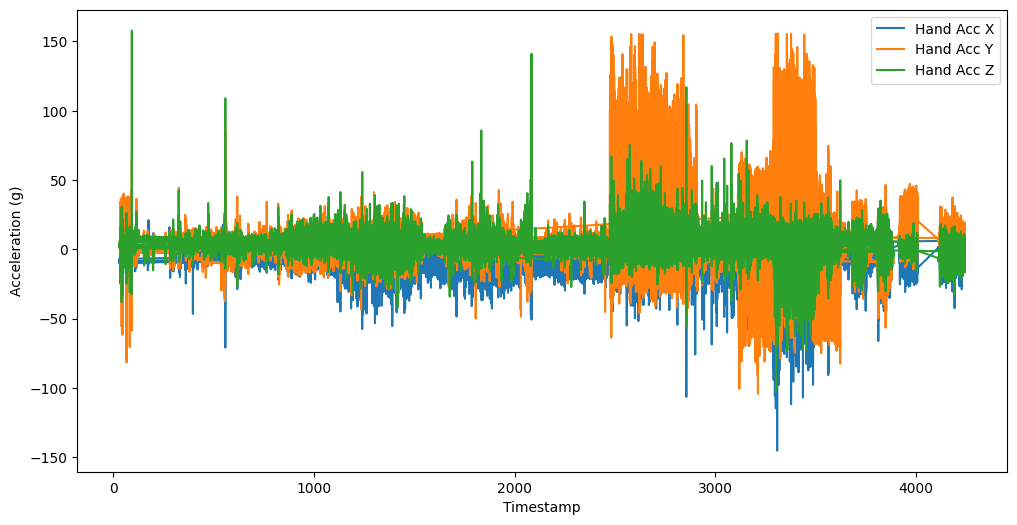

In [11]:
# Visualize the sensor data: Plot the raw sensor data from the accelerometer, gyroscope, and magnetometer to get a sense of how the data looks. 
# An example to create time-series plots to visualize how the sensor data changes over time.
import matplotlib.pyplot as plt
import pandas as pd

# Create a new DataFrame for the hand accelerometer data
hand_acc = df[["handAcc16_1", "handAcc16_2", "handAcc16_3", "timestamp"]]

# Plot the hand accelerometer data
plt.figure(figsize=(12, 6))
plt.plot(hand_acc["timestamp"], hand_acc["handAcc16_1"], label="Hand Acc X")
plt.plot(hand_acc["timestamp"], hand_acc["handAcc16_2"], label="Hand Acc Y")
plt.plot(hand_acc["timestamp"], hand_acc["handAcc16_3"], label="Hand Acc Z")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration (g)")
plt.legend()
plt.show()

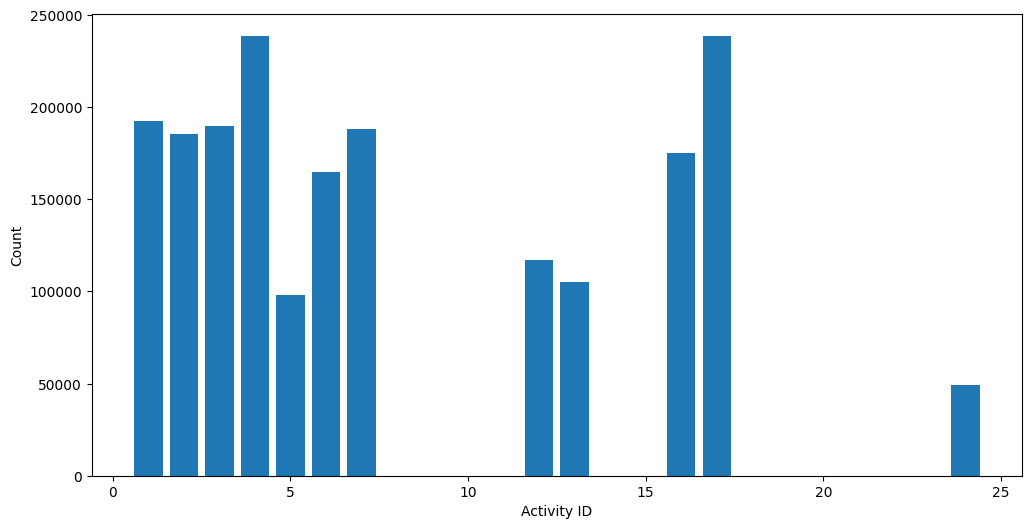

In [12]:
# Distribution of classes: Plot the distribution of classes in the dataset. 
# This will give an idea of how balanced the dataset is and whether certain activities are over or under-represented.

import matplotlib.pyplot as plt
import pandas as pd

# Get the count of each class in the dataset
class_counts = df["activityID"].value_counts()

# Plot the class counts
plt.figure(figsize=(12, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Activity ID")
plt.ylabel("Count")
plt.show()

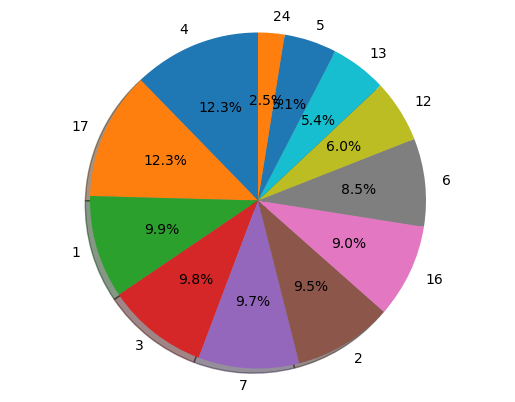

In [13]:
# pie chart for same purpose
labels = class_counts.index
sizes = class_counts.values
# Plot the class counts
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

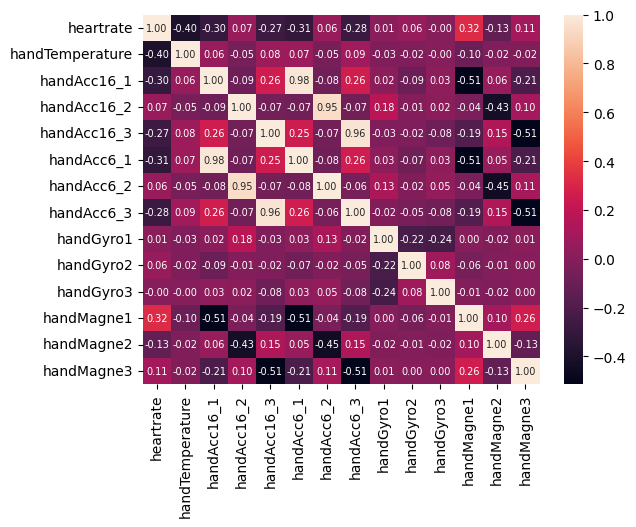

In [23]:
# Correlation between sensor data: Compute the correlation matrix between the sensor data to identify 
# any strong linear relationships between the features. 
# This can help to identify which sensors are most useful for activity recognition.

import seaborn as sns
import pandas as pd

# Select the sensor data columns only for hand
sensor_data = df.iloc[:, 2:16]

# Calculate the correlation matrix
corr = sensor_data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={'size': 7})
plt.show()


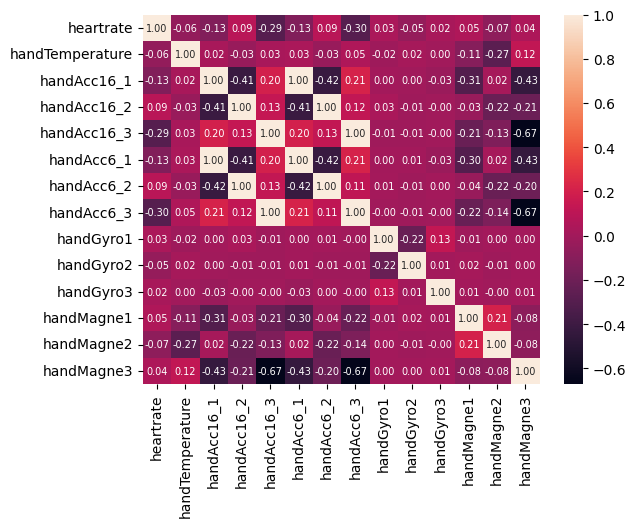

In [25]:
# An example of how you can create a heatmap to visualize the correlation between the sensor data of a particular activity:

# Select the activity for which you want to see the correlation
activity_id = 1
activity_data = df[df['activityID'] == activity_id]

# Select the sensor data columns
sensor_data = activity_data.iloc[:, 2:16]

# Calculate the correlation matrix
corr = sensor_data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={'size': 7})
plt.show()


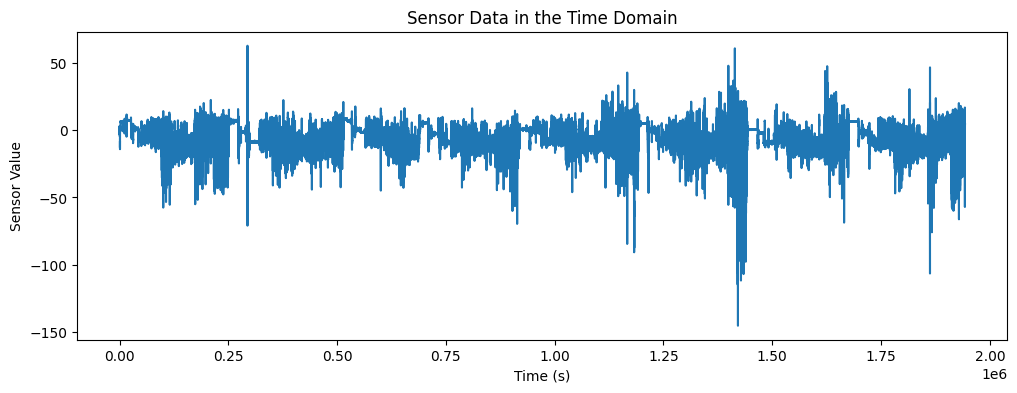

In [27]:
# Visualize the sensor data in different domains: Try visualizing the sensor data in different domains such as time domain, 
# frequency domain, and time-frequency domain. 
# This can help to identify patterns in the data that may not be apparent in the time domain alone.

# Select the sensor data column you want to visualize
sensor_data = df['handAcc16_1']

# Plot the sensor data in the time domain
plt.figure(figsize=(12, 4))
plt.plot(sensor_data)
plt.title("Sensor Data in the Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Sensor Value")
plt.show()


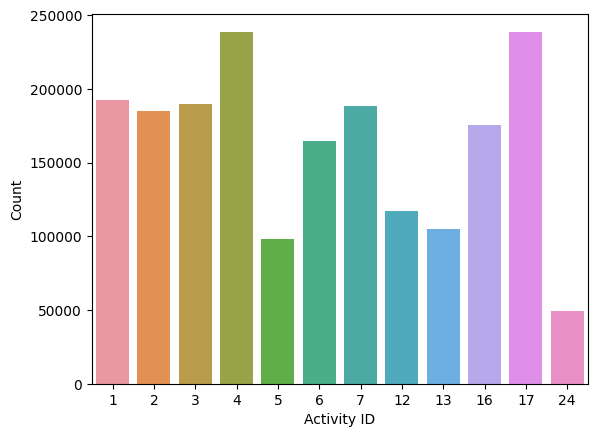

Class imbalance ratio: 4.837135332252836


In [28]:
# Study the class imbalance: Plot the distribution of classes in the dataset to see if there is a class imbalance.

# Count the number of instances of each class
class_counts = df['activityID'].value_counts()

# Plot the class counts
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("Activity ID")
plt.ylabel("Count")
plt.show()

# Print the class imbalance ratio
print("Class imbalance ratio:", class_counts.max() / class_counts.min())
